1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


Importamos las diferentes librerias y el data set que nos ayudaran a realizar Regresión Logistica e imprimimos el dataframe con 50 registros o filas llamado conjutoDatos para desarrollar la actividad.

In [1]:
# Importando Librerias de regresion logistic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
conjuntoDatos = pd.read_csv('./Titanic-Dataset.csv')
conjuntoDatos.head(10)


,Sobrevivio,Clase,Sexo,Edad
0,0,3,1,22
1,1,1,0,38
2,1,3,0,26
3,1,1,0,35
4,0,3,1,35
5,0,3,1,29
6,0,1,1,54
7,0,3,1,2
8,1,3,0,27
9,1,2,0,14


In [2]:
conjuntoDatos.fillna(conjuntoDatos.mean())
conjuntoDatos

,Sobrevivio,Clase,Sexo,Edad
0,0,3,1,22
1,1,1,0,38
2,1,3,0,26
3,1,1,0,35
4,0,3,1,35
...,...,...,...,...
886,0,2,1,27
887,1,1,0,19
888,0,3,0,29
889,1,1,1,26


Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [3]:
#Eliminamos columnas que no seran de estudio en esta oportunidad.
#conjuntoDatos = conjuntoDatos.drop(columns = ['SibSp', 'Parch', 'Fare'])
#conjuntoDatos
#Aplicamos los cambios permanentes en el dataframe.
conjuntoDatos.to_csv('./Titanic-Dataset.csv',index = False)


In [4]:
#imputamos valores con la media de los datos en cada columna
conjuntoDatos = conjuntoDatos.fillna(conjuntoDatos.mean())
conjuntoDatos

,Sobrevivio,Clase,Sexo,Edad
0,0,3,1,22
1,1,1,0,38
2,1,3,0,26
3,1,1,0,35
4,0,3,1,35
...,...,...,...,...
886,0,2,1,27
887,1,1,0,19
888,0,3,0,29
889,1,1,1,26


In [5]:
# Aplicamos los cambios en el dataset original.
conjuntoDatos.to_csv('./Titanic-Dataset.csv',index = False)

In [6]:
# Cambiamos el tipo de datos de la columna edad de float a int64
conjuntoDatos['Edad'] = conjuntoDatos['Edad'].apply(np.int64)
conjuntoDatos

,Sobrevivio,Clase,Sexo,Edad
0,0,3,1,22
1,1,1,0,38
2,1,3,0,26
3,1,1,0,35
4,0,3,1,35
...,...,...,...,...
886,0,2,1,27
887,1,1,0,19
888,0,3,0,29
889,1,1,1,26


Imprimimos la información del dataframe para saber si hay datos faltantes

In [7]:
#imprimimos la informacion de las columnas del dataframe
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sobrevivio  891 non-null    int64
 1   Clase       891 non-null    int64
 2   Sexo        891 non-null    int64
 3   Edad        891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


In [8]:
#Cambiamos la variable sexo a boleana para poder usarla como variable categorica
conjuntoDatos['Sexo'] = conjuntoDatos['Sexo'].astype('category').cat.codes
conjuntoDatos

,Sobrevivio,Clase,Sexo,Edad
0,0,3,1,22
1,1,1,0,38
2,1,3,0,26
3,1,1,0,35
4,0,3,1,35
...,...,...,...,...
886,0,2,1,27
887,1,1,0,19
888,0,3,0,29
889,1,1,1,26


In [9]:
# Volvemos a guardar los cambios en el dataset
conjuntoDatos.to_csv('./Titanic-Dataset.csv',index = False)

In [10]:
conjuntoDatos.describe()

,Sobrevivio,Clase,Sexo,Edad
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332
std,0.486592,0.836071,0.477990,13.013778
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000
50%,0.000000,3.000000,1.000000,29.000000
75%,1.000000,3.000000,1.000000,35.000000
max,1.000000,3.000000,1.000000,80.000000


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

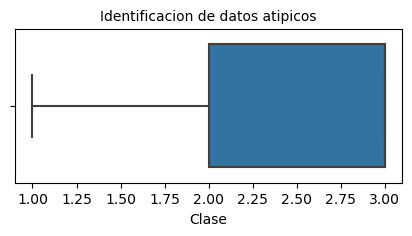

In [11]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Clase"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

La grafica muestra que exsten datos atipicos pero esos datos pertenecen a la ausencia de dolores a nivele de torax y una persona puede tener o no dolor.

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [12]:

conjuntoDatos["Clase"].value_counts()

Clase
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
conjuntoDatos["Sobrevivio"].value_counts()

Sobrevivio
0    549
1    342
Name: count, dtype: int64

Contamos e imprimimos la cantidad de valores 0 como 1  en la columna Survived columna objetivo del analisis.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

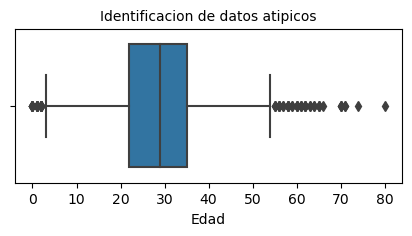

In [14]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Edad"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos la variable Objetivo y no encontramos datos atipicos.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

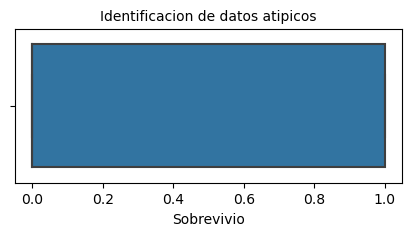

In [15]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Sobrevivio"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos la variable Clase importante para el analisis de supervivencia y vemos datos atipicos o erroneos entonces nos disponemos a identificarlos.

In [16]:
conjuntoDatos

,Sobrevivio,Clase,Sexo,Edad
0,0,3,1,22
1,1,1,0,38
2,1,3,0,26
3,1,1,0,35
4,0,3,1,35
...,...,...,...,...
886,0,2,1,27
887,1,1,0,19
888,0,3,0,29
889,1,1,1,26


In [17]:
conjuntoDatos.describe()

,Sobrevivio,Clase,Sexo,Edad
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332
std,0.486592,0.836071,0.477990,13.013778
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000
50%,0.000000,3.000000,1.000000,29.000000
75%,1.000000,3.000000,1.000000,35.000000
max,1.000000,3.000000,1.000000,80.000000


In [18]:
# Contamos el numero de bebes del titanic
numbebes = conjuntoDatos.apply(lambda numero_bebes: numero_bebes['Edad'] < 2, axis= 1).sum()
print('Número de bebes en el titanic', numbebes)


Número de bebes en el titanic 14


In [19]:
adultosmayores = conjuntoDatos.apply(lambda numero_bebes: numero_bebes['Edad'] > 70, axis= 1).sum()
print('Número de Adultos mayores', adultosmayores)

Número de Adultos mayores 4


c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


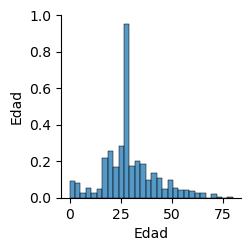

In [21]:
sns.pairplot(conjuntoDatos[['Edad']])
mplot.show()

c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


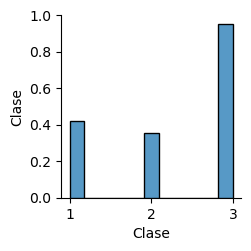

In [20]:
sns.pairplot(conjuntoDatos[['Clase']])
mplot.show()

In [65]:
# Definimos un metodo para dividir el dataset.
def dividir_test(conjuntoDatos, test_size, label):
    train, test = train_test_split(conjuntoDatos, test_size = test_size)
    propiedades = conjuntoDatos.columns.drop(label)
    train_X = train[propiedades]
    train_y = train[label]
    test_X = test[propiedades]
    test_y = test[label]
    return train_X, train_y, test_X, test_y

In [66]:
train_X, train_y, test_X, test_y = dividir_test(conjuntoDatos, 0.25, 'Sobrevivio')

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [67]:

X = conjuntoDatos.drop('Sobrevivio',axis=1)
Y = conjuntoDatos['Sobrevivio']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [68]:
print(X_train)

     Clase  Sexo  Edad
105      3     1    28
68       3     0    17
253      3     1    30
320      3     1    22
706      2     0    45
..     ...   ...   ...
835      1     0    39
192      3     0    19
629      3     1    29
559      3     0    36
684      2     1    60

[668 rows x 3 columns]


In [69]:
print(Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Sobrevivio, Length: 668, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [70]:
#from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression(solver = "liblinear")
regresion_logistica.fit(X_train, Y_train)
prediccion = regresion_logistica.predict(X_test)

In [71]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Sobrevivio, Length: 223, dtype: int64


In [72]:
print(prediccion)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [73]:
# hacemos una predicción si un pasajero sobrevive dependiendo de la edad.
regresion_logistica.predict(np.array([[1,0,80]]))[0]

c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [74]:
# predecimos si una persona en clase  3 con 80 años podria sobrevivir
regresion_logistica.predict(np.array([[3,1,80]]))[0]

c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [80]:
regresion_logistica.predict(np.array([[3,0,30]]))[0]

c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [76]:
print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       139
           1       0.72      0.69      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

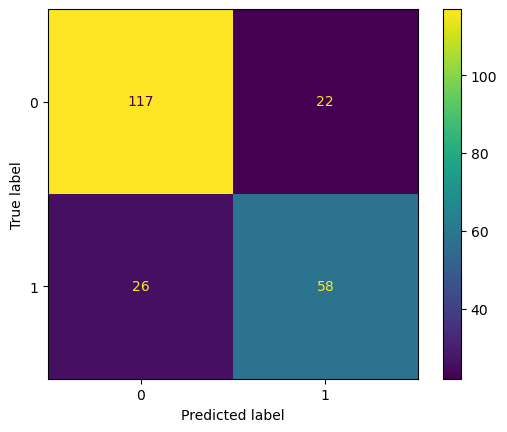

In [77]:
matriz_confusion = confusion_matrix(Y_test, prediccion)
visualizar = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizar.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

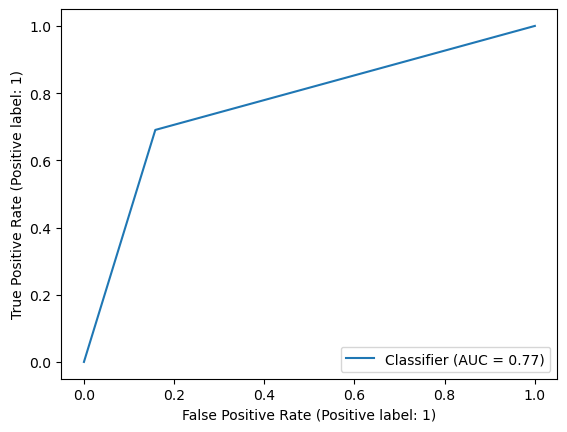

In [78]:

RocCurveDisplay.from_predictions(Y_test, prediccion)
mplot.show

8. Interpretar, analizar y documentar los resultados obtenidos.

Despues de generar el modelo interpretamos, analizamos documentamos hallazgos:

1. PRECISION: Entonces, para las veces que dijo que no sobrevivian el modelo acerto en el 82%, pero para las veces que dijo que si, acerto en el 72%, significa esto que la mayoria de los sobrevivientes del barco se encontraban en primera clase.

2. RECALL: Para recall acerto en funcion de la clase objetivo (Survived) en la no supervivencia en el 84%, y en que si sobrevivirian en el 69%, diciendo esto que se estimo correctamente a los sobrevivientes.

3. F1 SCORE: Encontramos que se logro equilibrar el modelo con un 83%.

Matriz de confusion interpretamos los datos generados.

1. VERDADEROOS POSITIVOS: En este cuadro el clasificador predijo en 117 del recuento como verdaderos.
2. VERDADEROS NEGATIVOS: El clasificador predijo en consecuencia que el recuento era de 26 aciertos.
3. FALSOS POSITIVOS: El recuento de un clasificador en las predicciones acerto 22 veces.
4. FALSOS NEGATIVOS: predicciones de un clasificador reconto 58 aciertos.

LA CURVA ROC.
Las predicciones son correctas en los limites mostrado en el AUC de la curva 0.77%.





